# Load packages

In [1]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import minimize
from scipy.stats import gumbel_r
from matplotlib.pyplot import cm
import math
import matplotlib
import matplotlib.colors as mcolors
from scipy.optimize import fsolve

import sympy
from sympy import *
from sympy import symbols, Eq, solve
from shapely.geometry import LineString


%matplotlib inline
import warnings
from scipy.stats import pearsonr
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cmasher as cmr
# plt.style.use('ggplot')
import matplotlib.ticker as mtick
from scipy.stats import norm
from matplotlib import pyplot, transforms
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns




Input = 'Input22'
output = 'Output22'

colors2 = ['#6CC24A','#FFB81C', '#A50034'] # groen geel rood
colors4 = [ '#A50034', '#FFB81C', '#6CC24A'] # rood geel groen
colors = ['#0098FA', '#0167A9', '#002C48'] # blauw blauw blauw
c3 = ['#009B77', '#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77', '#EF60A3'] # groen groen geel oranjerood paarsrood paars roze
c4 = ['#6CC24A', '#FFB81C', '#EC6842', '#A50034', '#6F1D77'] # groen geel oranjerood paarsrood paars
c5 = ['#6CC24A', '#FFB81C', '#6F1D77', '#6F1D77'] # groen geel paars paars

colors5 = ['#009B77', '#6CC24A','#FFB81C', '#EC6842', '#A50034'] # donkergroen groen geel oranje rood

In [2]:
WFLOW = dict([
    ("La Meuse Goncourt", "1011"),
    ("Le Mouzon Circourt-sur-Mouzon [Villars]", "1013"),
    ("Le Vair Soulosse-sous-Saint-Élophe", "1016"),
    ("La Meuse Saint-Mihiel", "101"),
    ("La Meuse Stenay", "3"),
    ("La Bar Cheveuges", "41"),
    ("La Vence la Francheville", "42"),
    ("La Sormonne Belval", "43"),
    ("Membre Pont ", "5"),
    ("Sainte-Marie", "503"),
    ("Straimont ", "501"),
    ("La Chiers Carignan", "201"),
    ("La Chiers Longlaville", "203"),
    ("La Crusnes Pierrepont", "206"),
    ("Le Ton Écouviez", "207"),
    ("Le Loison Han-lés-Juvigny", "209"),
    ("Treignes ", "6"),
    ("Chooz ", "4"),
    ("Daverdisse ", "802"),
    ("Jemelle ", "803"),
    ("Gendron ", "801"),
    ("Hastiere", "701"),
    ("Yvoir ", "702"),
    ("Warnant ", "703"),
    ("Modave ", "704"),
    ("Ortho ", "1002"),
    ("Mabompre ", "1003"),
    ("Tabreux ", "10"),
    ("Wiheries ", "903"),
    ("Salzinnes ", "9"),
    ("Huccorgne ", "13"),
    ("Amay ", "1401"),
    ("Martinrive ", "11"),
    ("Chaudfontaine Pisc ", "12"),
    ("Maastricht", "16"),
])

# Load data

In [3]:
GB = pd.read_csv(f'1_Input/{Input}/GB.csv', index_col=0)
USA = pd.read_csv(f'1_Input/{Input}/USA.csv', index_col=0)
FR = pd.read_csv(f'1_Input/{Input}/FR.csv', index_col=0)
BE = pd.read_csv(f'1_Input/{Input}/BE.csv', index_col=0)

datasets = [GB, USA, BE, FR]
dataset_names = ['CAMELS GB', 'CAMELS USA', 'Meuse', 'Meuse']
dataset_names_complete = ['CAMELS GB', 'CAMELS USA', 'Meuse BE', 'Meuse FR']
colorsTU = ['#FFB81C', '#00B8C8', '#6F1D77','#6F1D77']

yrsl_GB = ['1971 - 1980', '1981 - 1990', '1991 - 2000', '2001 - 2010']
yrsl_USA = ['1981 - 1989', '1990 - 1999', '2000 - 2009']
yrsl_be = ['1999 - 2008', '2009 - 2018']
yrsl_fr = ['1989 - 1998', '1999 - 2008', '2009 - 2018']


yrsls = [yrsl_GB, yrsl_USA, yrsl_be, yrsl_fr]

# display(FR)
# display(BE)
# display(USA)
# display(GB['EI deviation 2001 - 2010'])

# GB.keys()

In [4]:
print(BE.columns)
print(FR.columns)

Index(['AI', 'EI', 'Pa', 'Epa', 'T', 'is_dur', 'SI', 'ST', 'Sr', 'Qa',
       'AI 1999 - 2008', 'EI 1999 - 2008', 'Pa 1999 - 2008', 'Epa 1999 - 2008',
       'T 1999 - 2008', 'is_dur 1999 - 2008', 'SI 1999 - 2008',
       'ST 1999 - 2008', 'omega 1999 - 2008', 'Sr actual 1999 - 2008',
       'omega past decades 1999 - 2008', 'AI 2009 - 2018', 'EI 2009 - 2018',
       'Pa 2009 - 2018', 'Epa 2009 - 2018', 'T 2009 - 2018',
       'is_dur 2009 - 2018', 'SI 2009 - 2018', 'ST 2009 - 2018',
       'omega 2009 - 2018', 'Sr actual 2009 - 2018',
       'omega past decades 2009 - 2018', 'EI expected 2009 - 2018',
       'EI deviation 2009 - 2018', 'Pa_change 2009 - 2018',
       'Epa_change 2009 - 2018', 'T_change 2009 - 2018',
       'AI_change 2009 - 2018', 'SI_change 2009 - 2018',
       'is_dur_change 2009 - 2018', 'ST_change 2009 - 2018',
       'Sr expected 2009 - 2018', 'Sr deviation 2009 - 2018',
       'Sr relative 2009 - 2018'],
      dtype='object')
Index(['AI', 'EI', 'Pa', 'Epa', 'T',

In [5]:
Meuse = pd.DataFrame()
for i in range(len(FR)):
    name = FR.index[i]
    wflow = WFLOW[name]
    EI_dev99 = FR.loc[name, 'EI deviation 1999 - 2008']
    EI_dev09 = FR.loc[name, 'EI deviation 2009 - 2018']
    Meuse.loc[wflow, 'EI deviation 1999 - 2008'] = EI_dev99
    Meuse.loc[wflow, 'EI deviation 2009 - 2018'] = EI_dev09
              

for i in range(len(BE)):
    name = BE.index[i]
    wflow = WFLOW[name]
    EI_dev09 = BE.loc[name, 'EI deviation 2009 - 2018']
    Meuse.loc[wflow, 'EI deviation 2009 - 2018'] = EI_dev09
    
display(Meuse)

file_path = r'C:\Users\Nienke Tempel\Documents\Thesis\12. QGIS\Attributes csvs\meuse.csv' 
Meuse.to_csv(file_path) 

,EI deviation 1999 - 2008,EI deviation 2009 - 2018
1011,-0.018781,0.021252
1013,-0.003313,-0.049542
1016,-0.016352,-0.048180
101,0.022543,-0.009604
3,0.002093,-0.034098
203,0.049299,-0.170578
201,-0.007741,-0.180073
41,-0.004641,-0.090508
42,-0.005785,-0.027623
5,NaN,-0.149769


In [6]:
# Drop catchment met nan values
nan_values = GB.loc[GB["Sr deviation 1981 - 1990"].isna()]
print(nan_values)
GB.dropna(subset=["Sr deviation 1981 - 1990"], inplace=True)

             AI        EI        Pa        Epa         T  is_dur        SI  \
93001  0.148557  0.113769  2731.368  405.76388  6.597483  2.9099  0.305478   

             ST         Sr  AI 1971 - 1980  ...  ST_change 2001 - 2010  \
93001  0.197289  55.588557        0.161069  ...               0.060188   

       Sr expected 1981 - 1990  Sr expected 1991 - 2000  \
93001                      NaN                73.962895   

       Sr expected 2001 - 2010  Sr deviation 1981 - 1990  \
93001                59.698554                       NaN   

       Sr relative 1981 - 1990  Sr deviation 1991 - 2000  \
93001                      NaN                 -0.085585   

       Sr relative 1991 - 2000  Sr deviation 2001 - 2010  \
93001                -0.001158                 -1.804872   

       Sr relative 2001 - 2010  
93001                -0.031176  

[1 rows x 95 columns]


In [7]:
# Print aantal catchments per dataset

print(len(GB))
print(len(USA))
print(len(FR)+len(BE))

print(94+169+23)

94
169
23
286


# Budyko plots

## 1. Normal Budyko plot

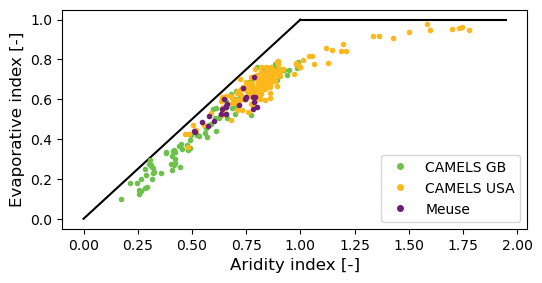

In [8]:
plt.figure(figsize=(6,3))

budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Evaporative index [-]", fontsize=12)
plt.xlabel("Aridity index [-]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        plt.plot(AI, EI, marker='.', c = c5[u], alpha=1, markersize = 6)

legend_el = [Line2D([0], [0], marker='.', linestyle='None', color = c5[0], markerfacecolor=c5[0], label=dataset_names[0], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = c5[1], markerfacecolor=c5[1], label=dataset_names[1], markersize = 8),
             Line2D([0], [0], marker='.', linestyle='None', color = c5[2], markerfacecolor=c5[2], label=dataset_names[2], markersize = 8)]

plt.legend(handles=legend_el, loc='lower right', fontsize=10)
plt.subplots_adjust(bottom=0.15)
# plt.subplots_adjust(left=-0.15)




plt.savefig(f'2_Output/{output}/1_Budyko_normal_v1.pdf')   

## 2. Plot Sr values in Budyko

### Total time period

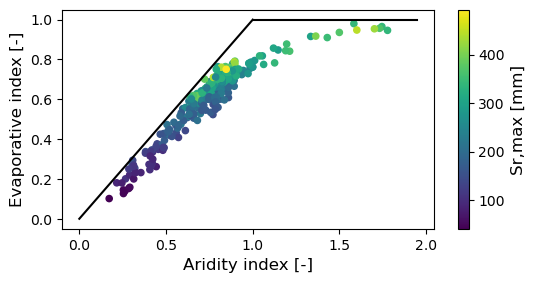

In [9]:
plt.figure(figsize=(6,3))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Evaporative index [-]", fontsize=12)
plt.xlabel("Aridity index [-]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

AI_total = []
EI_total = []
Sr_total = []

for u in range(len(datasets)):
    dataset = datasets[u]
    for i in range(len(dataset)):  
        AI = dataset.iloc[i]['AI']
        EI = dataset.iloc[i]['EI']
        Sr = dataset.iloc[i]['Sr']
        
        AI_total.append(AI)
        EI_total.append(EI)
        Sr_total.append(Sr)
        
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='viridis', s=20)
cbar = plt.colorbar(cmap='viridis')
cbar.ax.set_ylabel('Sr,max [mm]', fontsize=12)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(bottom=0.15)


plt.savefig(f'2_Output/{output}/2_Budyko_colored_Sr.pdf')   

### Sr deviations combined

-123.99048027963676 146.81927930258848


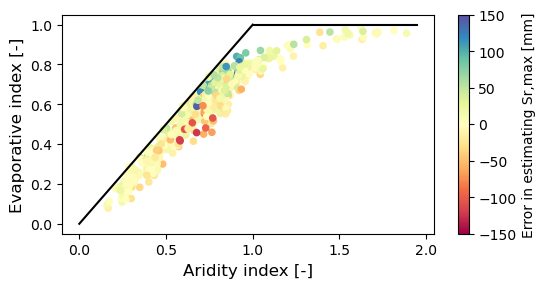

In [10]:
AI_total = []
EI_total = []
Sr_total = []

plt.figure(figsize=(6,3))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Evaporative index [-]", fontsize=12)
plt.xlabel("Aridity index [-]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']        
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
cmap = cmr.pride
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='Spectral', s=20)
plt.colorbar(label='Error in estimating Sr,max [mm]')   
# plt.title(f'Sr deviations total')
plt.clim(-150, 150)    
plt.subplots_adjust(bottom=0.15)

plt.savefig(f'2_Output/{output}/2_Deviation_Sr_all.pdf')   

print(min_dev, max_dev)

### Sr deviations relative per decade (per dataset)

In [11]:
for u in range(len(datasets)):
    dataset = datasets[u]
    print(dataset_names[u])
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            AI_total = []
            EI_total = []
            Sr_total = []
            fig = plt.figure(figsize=(6,3.5))
            # fig.set_facecolor('xkcd:mint green')
            budyko_curve_x = np.arange(1, 2, 0.05)
            energy_limit_x = np.arange(0, 1.0001, 0.05)
            x = np.arange(0, 1.0001, 0.05)
            water_limit_y = 1 + budyko_curve_x*0
            energy_limit_y = energy_limit_x
            y = 1 + x*0
            plt.ylabel("Actual ET/P")
            plt.xlabel("Potential ET/P")
            plt.plot(energy_limit_x, energy_limit_y, c='k')
            plt.plot(budyko_curve_x, water_limit_y,c='k')
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                
            cmap = cmr.prinsenvlag
            plt.scatter(AI_total, EI_total, c=Sr_total, cmap='Spectral', s=40)
            plt.colorbar(label='Error in estimating root zone storage capacity', format='%.0f%%')   
            plt.clim(-100, 100)
            plt.title(f'{dataset_names_complete[u]}, {yrsl[j]}')
    
            plt.savefig(f'2_Output/{output}/2_Relative_Deviation_Sr_{dataset_names_complete[u]}, {yrsl[j]}.png')   
            plt.close(fig)

CAMELS GB
CAMELS USA
Meuse
Meuse


### Sr deviations combined relative

-16.535656468576235 0
652


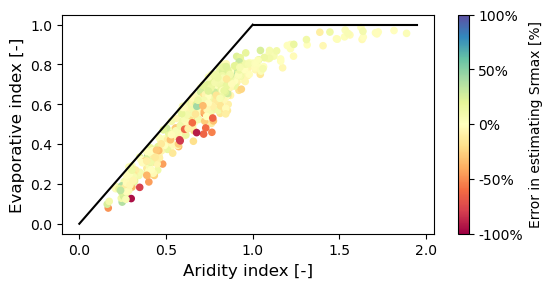

In [12]:
AI_total = []
EI_total = []
Sr_total = []

fig = plt.figure(figsize=(6,3))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Evaporative index [-]", fontsize=12)
plt.xlabel("Aridity index [-]", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')

min_dev = 0
max_dev = 0

for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']*100
                AI_total.append(AI)
                EI_total.append(EI)
                Sr_total.append(Sr_dev_rel)
                if Sr_dev > max_dev:
                    max_dev = Sr_dev
                if Sr_dev < min_dev:
                    min_dev = Sr_dev
                
plt.scatter(AI_total, EI_total, c=Sr_total, cmap='Spectral', s=20)
plt.colorbar(label='Error in estimating Srmax [%]', format='%.0f%%')   
plt.clim(-100, 100)
plt.subplots_adjust(bottom=0.15)

plt.savefig(f'2_Output/{output}/2_Relative_Deviation_Sr_all.pdf')   

print(min_dev, max_dev)
print(len(Sr_total))

## 3. Budyko with ranges

In [13]:
def w_function(AI, w):
    EI = 1 + AI - (1 + (AI**w))**(1/w)
    return EI

### Arrays of EI, AI en EI_dev, Sr_dev

In [14]:
nr = 11

nrs = np.linspace(0, 2, nr)

outliers = []

EI_mean_total = [[], [], [], [], [], [], [], [], [], []]
AI_mean_total = [[], [], [], [], [], [], [], [], [], []]
EI_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_total = [[], [], [], [], [], [], [], [], [], []]
Sr_dev_rel_total = [[], [], [], [], [], [], [], [], [], []]


for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                AI = catch_dat[f'AI {yrsl[j]}']
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                EI = catch_dat[f'EI {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']  
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']  
                if Sr_dev_rel > 0.99 or Sr_dev_rel < -0.99:
                    outliers.append(catch_dat)
                    # print(dataset.idx)
                    print(f'Outlier added with index: {catch_dat}')
                
                
                for n in range(len(nrs)):
                    if nrs[n] <= AI < nrs[n+1]:
                        EI_mean_total[n].append(EI)
                        EI_dev_total[n].append(EI_dev)
                        AI_mean_total[n].append(AI)
                        Sr_dev_total[n].append(Sr_dev)
                        Sr_dev_rel_total[n].append(Sr_dev_rel)
                        
EI_mean = np.zeros(nr-1)
AI_mean = np.zeros(nr-1)

for n in range(len(EI_mean_total)):
    EI_mean[n] = np.mean(EI_mean_total[n])
    AI_mean[n] = np.mean(AI_mean_total[n])
    
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 0


In [15]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(12.5)
    fig.set_figwidth(4)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        axs.get_xaxis().set_visible(False)
        axs.get_yaxis().set_visible(False)
        axs.spines['top'].set_visible(False)
        axs.spines['right'].set_visible(False)
        axs.spines['bottom'].set_visible(False)
        axs.spines['left'].set_visible(False)
        frameon=False
        plt.savefig(f'2_Output/{output}/3_EI_dev_{n}.png', transparent=True)  
        n_working.append(n)
        c += 1

    plt.close()

### Budyko summary plot EI deviations (new format)

72
96
240
193
24


C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_27416\3317736945.py:46: RuntimeWarning: divide by zero encountered in divide
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)
C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_27416\3317736945.py:46: RuntimeWarning: overflow encountered in power
  Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)


<Figure size 200x800 with 0 Axes>

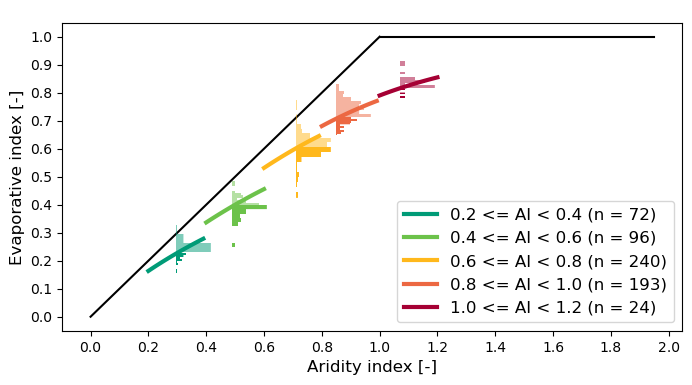

In [17]:
fig = plt.figure(figsize=(2,8))
fig, ax = plt.subplots(figsize=(8, 4))
budyko_curve_x = np.arange(1, 2, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)
water_limit_y = 1 + budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0
plt.ylabel("Evaporative index [-]", fontsize=12)
plt.xlabel("Aridity index [-]", fontsize=12)
plt.plot(energy_limit_x, energy_limit_y, c='k')
plt.plot(budyko_curve_x, water_limit_y,c='k')
# ax.yaxis.grid(color='gray', linestyle='dashed')
# ax.xaxis.grid(color='gray', linestyle='dashed')
ax.set_yticks([0,0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_xticks([0,0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])



def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.083)

AI_working = []
AI_graph = []
EI_working = []
paths = []
c=0

for n in (n_working):
    EI = float(EI_mean[n])
    AI = float(AI_mean[n])
    AI_plus = AI+0.05
    
    AI_working.append(AI)
    AI_graph.append(AI_plus)
    EI_working.append(EI)
    
    n_dev = len(EI_dev_total[n]) 
    print(n_dev)
        
    label = f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {n_dev})'

    
    EI_line = np.linspace(EI, EI, 100000)
    w_array = np.linspace(0, 15, 100000)
    Eq_tosolve = 1 + AI - (1 + (AI**w_array))**(1/w_array)

    first_line = LineString(np.column_stack((w_array, EI_line)))
    second_line = LineString(np.column_stack((w_array, Eq_tosolve)))
    intersection = first_line.intersection(second_line)

    w = intersection.x
    
    # plot w function
    AI_array = np.arange(nrs[n], nrs[n+1], 0.01)
    EI_out = w_function(AI_array, w)
    plt.plot(AI_array, EI_out, linewidth = 3, label = label, color=colors5[c])
    
    paths.append(f'2_Output/{output}/3_EI_dev_{n}.png')
    c+=1
    
    
for x0, y0, path in zip(AI_graph, EI_working, paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)


plt.legend(loc = 'lower right', fontsize="12")
plt.savefig(f'2_Output/{output}/3_Budyko_image_EI_deviations.pdf')  

#### Plotjes EI_dev met details (5 seperate)

In [18]:
n_working = []
c = 0
for n in range(len(EI_dev_total)):
    fig, axs = plt.subplots(1, 1)
    fig.set_figheight(9.371)
    fig.set_figwidth(3)

    EI_dev = EI_dev_total[n]
    
    EI_dev_neg = []
    EI_dev_pos = []
    
    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
            
    length = len(EI_dev)

    if length > 10:
        plt.title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} (n = {length})')
        plt.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        plt.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        plt.ylim(-0.2, 0.2)
        # axs.get_xaxis().set_visible(False)
        # axs.get_yaxis().set_visible(False)
        # axs.spines['top'].set_visible(False)
        # axs.spines['right'].set_visible(False)
        # axs.spines['bottom'].set_visible(False)
        # axs.spines['left'].set_visible(False)
        frameon=False
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        
        mu = np.mean(EI_dev)
        p10 = np.percentile(EI_dev, 10)
        # p50 = np.percentile(EI_dev, 50)
        p90 = np.percentile(EI_dev, 90)
        
        plt.axhline(mu, color='grey', linewidth=2)
        plt.axhline(p10, color='grey', linewidth=2, linestyle='--')
        plt.axhline(p90, color='grey', linewidth=2, linestyle='--')

        

        
        # textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n50th percentile = {p50:.1} \n10th percentile = {p10:.1}'
        textstr = f'mean = {mu:.1} \n90th percentile = {p90:.1} \n10th percentile = {p10:.1}'

        
        
        # place a text box in upper left in axes coords
        axs.text(-0.05, 0.38, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
        
        plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr{n}.png', transparent=False)  
        n_working.append(n)
        c += 1

    plt.close()

#### EI dev with details in one image

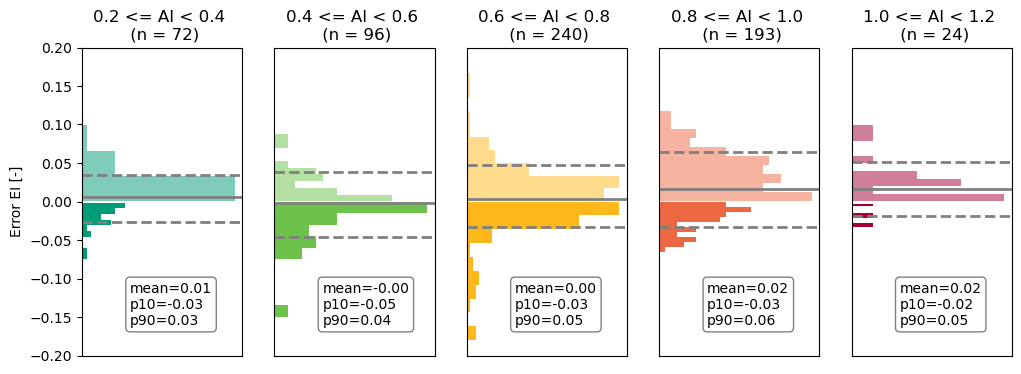

In [19]:
fig, axs = plt.subplots(1, 5)
fig.set_figheight(4)
fig.set_figwidth(12)
c = 0
for n in range(len(EI_dev_total)):
    EI_dev = EI_dev_total[n]
    EI_dev_neg = []
    EI_dev_pos = []

    mu = np.mean(EI_dev)
    p10 = np.percentile(EI_dev, 10)
    p90 = np.percentile(EI_dev, 90)

    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
    length = len(EI_dev)
    if length > 10:
        ax = axs[c]
        ax.set_title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} \n (n = {length})')
        ax.hist(EI_dev_neg, bins=10, alpha = 1, orientation='horizontal', color=colors5[c])
        ax.hist(EI_dev_pos, bins=10, alpha = 0.5, orientation='horizontal', color=colors5[c])
        ax.set_ylim(-0.2, 0.2)

        ax.axhline(mu, color='grey', linewidth=2)
        ax.axhline(p10, color='grey', linewidth=2, linestyle='--')
        ax.axhline(p90, color='grey', linewidth=2, linestyle='--')
        
        ax.annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.3, 0.1), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))

        # code for formatting and adding text
        if c != 0:
            ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        if c == 0:
            ax.set_ylabel('Error EI [-]')
        c += 1
plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr.png', transparent=False)


### Violin plots in one image

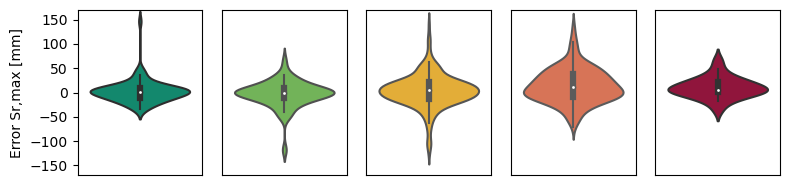

In [20]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(8, 2))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c])
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error Sr,max [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        if c != 0:
            axs[c].yaxis.set_visible(False)
            # axs[c].spines['top'].set_visible(False)
            # axs[c].spines['right'].set_visible(False)
            # axs[c].spines['bottom'].set_visible(False)
            # axs[c].spines['left'].set_visible(False)
        n_working.append(n)
        c += 1

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


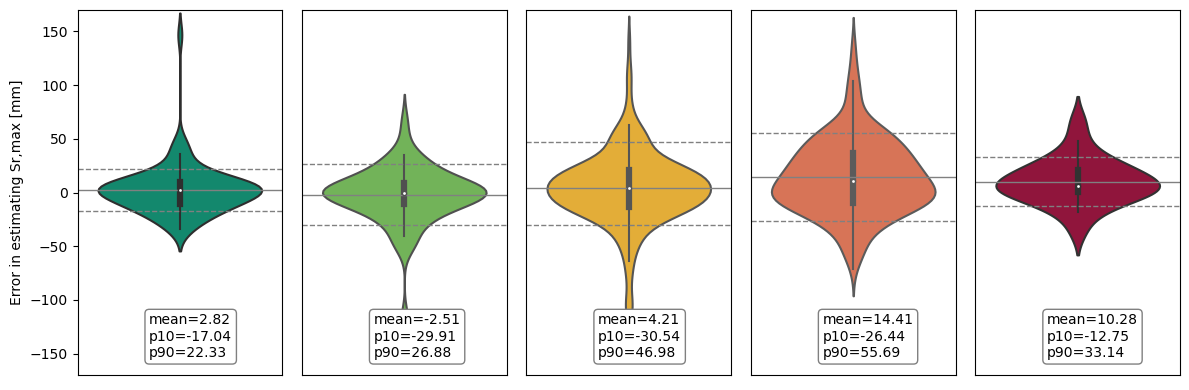

In [21]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    length = len(Sr_dev)
    
    mu = np.mean(Sr_dev)
    p10 = np.percentile(Sr_dev, 10)
    p90 = np.percentile(Sr_dev, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-170, 170)
        axs[c].set_ylabel('Error in estimating Sr,max [mm]')
        axs[c].set_xticks([])
        axs[c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.2f}\np10={p10:.2f}\np90={p90:.2f}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))


        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin.png', transparent=True)  
plt.tight_layout()


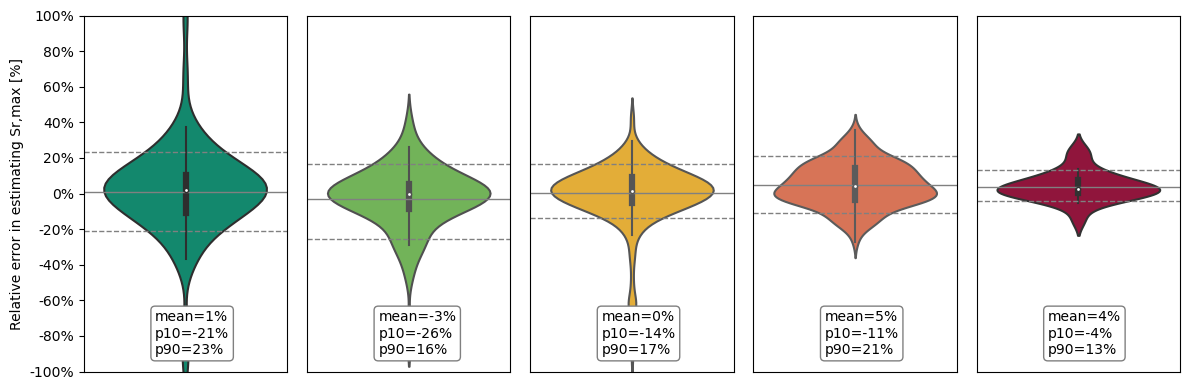

In [22]:
import seaborn as sns
fig, axs = plt.subplots(1, 5, figsize=(12, 4))

c = 0
for n in range(len(Sr_dev_rel_total)):
    Sr_dev_rel = Sr_dev_rel_total[n]
    length = len(Sr_dev_rel)
    
    mu = np.mean(Sr_dev_rel)
    p10 = np.percentile(Sr_dev_rel, 10)
    p90 = np.percentile(Sr_dev_rel, 90)
    
    if length > 10:
        sns.violinplot(Sr_dev_rel, ax=axs[c], color=colors5[c]) 
        axs[c].set_ylim(-1, 1)
        axs[c].set_ylabel('Relative error in estimating Sr,max [%]')
        axs[c].set_xticks([])
        
        axs[c].axhline(mu, color='grey', linewidth=1)
        axs[c].axhline(p10, color='grey', linewidth=1, linestyle='--')
        axs[c].axhline(p90, color='grey', linewidth=1, linestyle='--')
        axs[c].annotate(f"mean={mu:.0%}\np10={p10:.0%}\np90={p90:.0%}", (0.35, 0.05), xycoords='axes fraction', fontsize=10, bbox=dict(boxstyle="round", fc="white", ec="gray"))
        axs[c].set_yticks(np.linspace(-1, 1, 11))
        axs[c].set_yticklabels(['-100%', '-80%', '-60%', '-40%', '-20%', '0%', '20%', '40%', '60%', '80%', '100%'])
        if c != 0:
            axs[c].yaxis.set_visible(False)
        n_working.append(n)
        c += 1
    

plt.savefig(f'2_Output/{output}/3_Sr_dev_violin_rel.png', transparent=True)  
plt.tight_layout()


### Histogram Sr

C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_27416\578916680.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


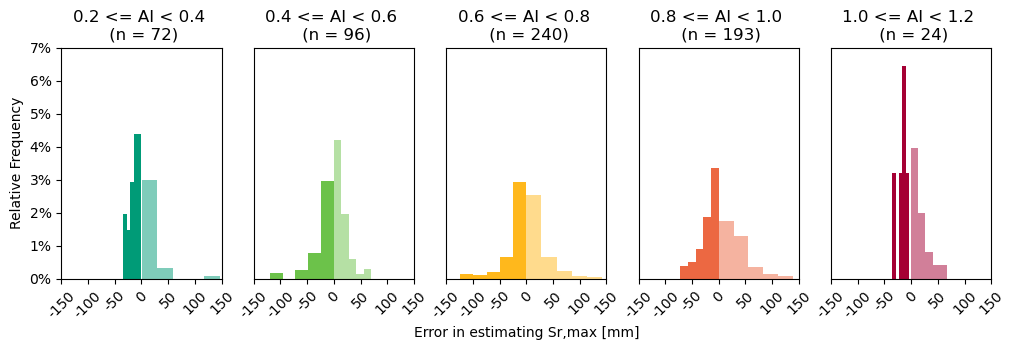

In [23]:
fig, axs = plt.subplots(1, 5)
fig.set_figheight(3)
fig.set_figwidth(12)
c = 0
for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    Sr_dev_neg = []
    Sr_dev_pos = []

    mu = np.mean(Sr_dev)
    p10 = np.percentile(Sr_dev, 10)
    p90 = np.percentile(Sr_dev, 90)

    for i in range(len(Sr_dev)):
        Sr_dev[i] = float(Sr_dev[i])
        if Sr_dev[i] < 0:
            Sr_dev_neg.append(Sr_dev[i])
        elif Sr_dev[i] >= 0:
            Sr_dev_pos.append(Sr_dev[i])
    length = len(Sr_dev)
    if length > 10:
        ax = axs[c]
        ax.set_title(f'{nrs[n]:.1f} <= AI < {nrs[n+1]:.1f} \n (n = {length})')
        ax.hist(Sr_dev_neg, bins=5, density=True, alpha = 1,  color=colors5[c])
        ax.hist(Sr_dev_pos, bins=5, density=True, alpha = 0.5,  color=colors5[c])
        ax.set_xlim(-150, 150)
        ax.set_xticks(np.linspace(-150, 150, 7))
        ax.set_xticklabels(np.linspace(-150, 150, 7).astype(int), rotation=45)
        ax.set_ylim(0,0.07)

        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        


        if c != 0:
            ax.yaxis.set_visible(False)
        if c == 0:
            ax.set_ylabel('Relative Frequency')
        c += 1

middle_ax = axs[len(axs)//2]

for ax in axs:
    if ax == middle_ax:
        ax.set_xlabel('Error in estimating Sr,max [mm]')

plt.savefig(f'2_Output/{output}/3_Sr_dev_details_nr.pdf', transparent= false)


# Results per dataset

### Make new arrays

In [24]:
EI_dev_total = [[], [], []]
Sr_dev_total =  [[], [], []]
Sr_dev_rel_total = [[], [], []]


for u in range(len(datasets)):
    dataset = datasets[u]
    yrsl = yrsls[u]
    for j in range(len(yrsl)):
        if j > 0:            
            for i in range(len(dataset)):
                catch_dat = dataset.iloc[i]
                EI_dev = catch_dat[f'EI deviation {yrsl[j]}']
                Sr_dev = catch_dat[f'Sr deviation {yrsl[j]}']  
                Sr_dev_rel = catch_dat[f'Sr relative {yrsl[j]}']  
                
                if u == 0 or u == 1:
                    EI_dev_total[u].append(EI_dev)
                    Sr_dev_total[u].append(Sr_dev)
                    Sr_dev_rel_total[u].append(Sr_dev_rel)
                else:
                    EI_dev_total[2].append(EI_dev)
                    Sr_dev_total[2].append(Sr_dev)
                    Sr_dev_rel_total[2].append(Sr_dev_rel)

### EI deviation per dataset

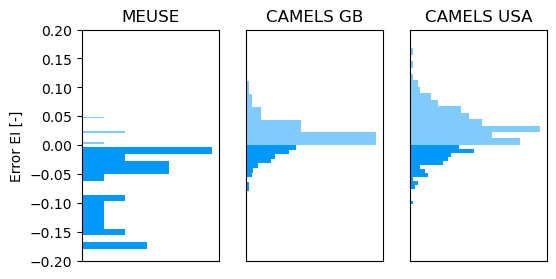

In [25]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(3)
fig.set_figwidth(6)
c = 0

titles = ["MEUSE", "CAMELS GB", "CAMELS USA"]

for n in range(len(EI_dev_total)):
    EI_dev = EI_dev_total[n]
    EI_dev_neg = []
    EI_dev_pos = []

    mu = np.mean(EI_dev)
    p10 = np.percentile(EI_dev, 10)
    p90 = np.percentile(EI_dev, 90)

    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
    length = len(EI_dev)
    if n == 0:
        c = 1
    elif n == 1:
        c = 2
    elif n == 2:
        c = 0
    if length > 10:
        ax = axs[c]
        ax.hist(EI_dev_neg, bins=15, alpha = 1, orientation='horizontal', color=colors[0])
        ax.hist(EI_dev_pos, bins=15, alpha = 0.5, orientation='horizontal', color=colors[0])
        ax.set_ylim(-0.2, 0.2)


        axs[c].set_title(titles[c])

        # code for formatting and adding text
        if c != 0:
            ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        if c == 0:
            ax.set_ylabel('Error EI [-]')
plt.savefig(f'2_Output/{output}/3_EI_dev_details_nr.pdf', transparent=False)

## EI deviation combined

In [26]:
EI_dev_together = EI_dev_total[0] + EI_dev_total[1] + EI_dev_total[2]
Meuse_all = EI_dev_total[2], EI_dev_together
# print(EI_dev_total[/2])

print(Meuse_all[1])

[-0.0456271873892846, 0.0022180625575519, 0.0384885495786936, -0.026235902809177, -0.0334541030624552, -0.018440689696385, 0.0037685829870406, 0.0076865289151065, -0.0619965012030374, -0.0329454722752494, -0.0329146887609854, -0.0477138122350659, -0.0117793170162589, 0.0662179017608631, 0.0051168783220125, -0.0038860241220764, -0.0131074063230506, 0.0074399009963921, -0.0334379785302689, 0.0352532643781442, -0.0103052254219927, 0.009244025835244, 0.0774527676538849, 0.0226539327575447, -0.0240144825580231, 0.0368082724501954, 0.0033095672478434, 0.0234013498114146, 0.0293622713427896, 0.0152142333807321, -0.001249744080448, 0.0089386595294076, 0.0059789332586449, 0.093515479900052, -0.0102364572849692, 0.0067736692314239, -0.0350701794712333, 0.0118026525517518, -0.0122769497275487, 0.0365229070460042, 0.0240679899165021, -0.0016303989029805, 0.0064148628236608, 0.0507797096346432, -0.0022513926551471, -0.0259983582211751, -0.0015840876559086, 0.0084508888346678, 0.0335459700816032, 0.

C:\Users\Nienke Tempel\AppData\Local\Temp\ipykernel_27416\2554320230.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


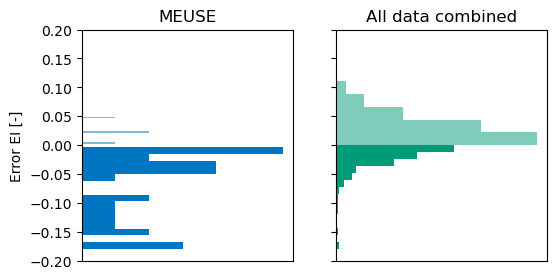

In [27]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(3)
fig.set_figwidth(6)
c = 0

titles = ["MEUSE", "All data combined"]

for n in range(len(Meuse_all)):
    EI_dev = Meuse_all[n]
    EI_dev_neg = []
    EI_dev_pos = []

    mu = np.mean(EI_dev)
    p10 = np.percentile(EI_dev, 10)
    p90 = np.percentile(EI_dev, 90)

    for i in range(len(EI_dev)):
        EI_dev[i] = float(EI_dev[i])
        if EI_dev[i] < 0:
            EI_dev_neg.append(EI_dev[i])
        elif EI_dev[i] >= 0:
            EI_dev_pos.append(EI_dev[i])
    length = len(EI_dev)
    ax = axs[n]
    
    if n == 0:
        ax.hist(EI_dev_neg, bins=15, alpha = 1, orientation='horizontal', color="#0076C2")
        ax.hist(EI_dev_pos, bins=15, alpha = 0.5, orientation='horizontal', color="#0076C2")
        
    else:
        ax.hist(EI_dev_neg, bins=15, alpha = 1, orientation='horizontal', color="#009B77")
        ax.hist(EI_dev_pos, bins=15, alpha = 0.5, orientation='horizontal', color="#009B77")
        
    ax.set_ylim(-0.2, 0.2)



    axs[n].set_title(titles[n])

    if n != 0:
        ax.set_yticklabels([''])
    ax.xaxis.set_visible(False)
    if n == 0:
        ax.set_ylabel('Error EI [-]')
plt.savefig(f'2_Output/{output}/3_EI_together.pdf', transparent=False)

## Sr relative and normal in one image (v2)

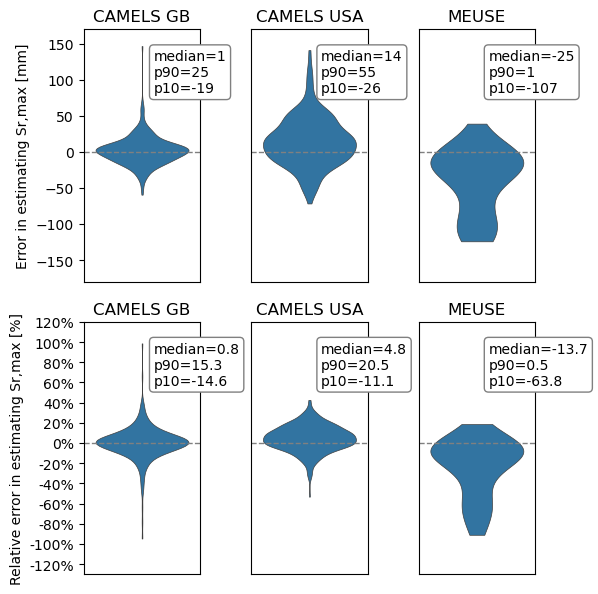

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(6, 6))

titles = ["CAMELS GB", "CAMELS USA","MEUSE"]

for n in range(len(Sr_dev_total)):
    Sr_dev = Sr_dev_total[n]
    Sr_dev_rel = Sr_dev_rel_total[n]
    
    if n == 0:
        c = 0
    elif n == 1:
        c = 1
    elif n == 2:
        c = 2
    
    median =  np.median(Sr_dev)
    p10 = np.percentile(Sr_dev, 10)
    p90 = np.percentile(Sr_dev, 90)
    
    sns.violinplot(Sr_dev, ax=axs[0,c], clip=True, cut=0, trim=False, inner=None, linewidth=0.5) 
    axs[0,c].set_ylim(-180, 170)
    axs[0,c].set_ylabel('Error in estimating Sr,max [mm]')
    axs[0,c].set_xticks([])
    axs[0,c].set_yticks([-150, -100, -50, 0, 50, 100, 150])
    axs[0,c].set_title(titles[c])
    axs[0,c].axhline(0, color='grey', linewidth=1, linestyle='--')
    axs[0,c].annotate(f"median={median:.0f}\np90={p90:.0f}\np10={p10:.0f}", 
                xy=(0.6, 0.75), xycoords='axes fraction', 
                fontsize=10, 
                bbox=dict(boxstyle="round", fc="white", ec="gray"))

    if c != 0:
        axs[0,c].yaxis.set_visible(False)
        
    median_rel =  np.median(Sr_dev_rel)
    median_rel_perc = median_rel*100
    p10_rel = np.percentile(Sr_dev_rel, 10)*100
    p90_rel = np.percentile(Sr_dev_rel, 90)*100
    
    sns.violinplot(Sr_dev_rel, ax=axs[1,c], clip=True, cut=0, trim=False, inner=None, linewidth=0.5) 
    axs[1,c].set_ylim(-1.3, 1.2)
    axs[1,c].set_ylabel('Relative error in estimating Sr,max [%]')
    axs[1,c].set_xticks([])
    axs[1,c].set_title(titles[c])
    axs[1,c].axhline(0, color='grey', linewidth=1, linestyle='--')
    axs[1,c].annotate(f"median={median_rel_perc:.1f}\np90={p90_rel:.1f}\np10={p10_rel:.1f}", 
                xy=(0.6, 0.75), xycoords='axes fraction', 
                fontsize=10, 
                bbox=dict(boxstyle="round", fc="white", ec="gray"))
    axs[1,c].set_yticks(np.linspace(-1.2, 1.2, 13))
    axs[1,c].set_yticklabels(['-120%','-100%', '-80%', '-60%', '-40%', '-20%', '0%', '20%', '40%', '60%', '80%', '100%', '120%'])

    if c != 0:
        axs[1,c].yaxis.set_visible(False)

plt.tight_layout()
plt.savefig(f'2_Output/{output}/combined_violin.pdf', transparent=True)

